# Stats 202C - Homework 1

## Monte Carlo Methods (Ch. 3)

## Peter Racioppo (103953689)

### In this homework we consider three problems based on Markov Chain theory and MCMC introduced in the lectures and textbook, BZ. These are more theoretical questions.

In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

import random
import math
import scipy
from scipy.linalg import eig

### 1) BZ, Chapter 3, Problem 1, page 47

### Consider the Markov kernel for the five families living in an island, where the numbers are changed.
### 1. Calculate the five eigenvalues, and their corresponding left and right eigenvectors (you can use any software package).
### • Plot the 5 eigenvalues (complex numbers) in a 2D plane, i.e. show them as dots in a unit circle (draw the unit circle for reference).

In [3]:
K = np.array([[0.3, 0.6, 0.1, 0.0, 0.0],
              [0.2, 0.0, 0.7, 0.0, 0.1],
              [0.0, 0.5, 0.0, 0.5, 0.0],
              [0.0, 0.0, 0.4, 0.1, 0.5],
              [0.4, 0.1, 0.0, 0.4, 0.1]])

In [7]:
# w: The eigenvalues, each repeated according to its multiplicity.
# vl: The normalized left eigenvector corresponding to the eigenvalue w[i] is the column vl[:,i].
# vr: The normalized right eigenvector corresponding to the eigenvalue w[i] is the column vr[:,i].

w, vl, vr = eig(K, left=True)
    
# Get indices of eigenvals by largest modulus:
idx = np.abs(w).argsort()[::-1]
# Sort eigenvals/vecs by largest modulus:
w = w[idx]
vl2 = vl[idx,:]
vr2 = vr[idx,:]
u1 = vl2[:,0] # First left eigenvec
v1 = vr2[:,0] # First right eigenvec

print("The eigenvalues of K are:")
print(w)
print("The left eigenvectors of K are:")
print(vl)
print("The right eigenvectors of K are:")
print(vr)

The eigenvalues of K are:
[ 1.        +0.j         -0.78333052+0.j          0.334007  -0.23948844j
  0.334007  +0.23948844j -0.38468348+0.j        ]
The left eigenvectors of K are:
[[ 0.32363469+0.j          0.00093998+0.44212512j  0.00093998-0.44212512j
   0.42509455+0.j         -0.04945955+0.j        ]
 [ 0.5118353 +0.j         -0.44488554+0.07405117j -0.44488554-0.07405117j
  -0.33142626+0.j         -0.42210365+0.j        ]
 [ 0.57322035+0.j         -0.3602954 -0.26799304j -0.3602954 +0.26799304j
  -0.14274007+0.j          0.65164392+0.j        ]
 [ 0.45643044+0.j          0.31700865-0.24818324j  0.31700865+0.24818324j
   0.61099668+0.j         -0.52508514+0.j        ]
 [ 0.31044306+0.j          0.48723231+0.j          0.48723231-0.j
  -0.5619249 +0.j          0.34500442+0.j        ]]
The right eigenvectors of K are:
[[ 0.4472136 +0.j          0.67309894+0.j          0.67309894-0.j
   0.44726124+0.j          0.29778249+0.j        ]
 [ 0.4472136 +0.j          0.0807174 +0.23508023j  

In [8]:
# Plots eigenvalues in the complex plane:
def f_Plot_Eigenvals(w):
    fig,ax = plt.subplots()
    ax.scatter(w.real,w.imag)
    theta = np.linspace(0, 2*np.pi, 100)
    r = np.sqrt(1.0)
    x1 = r*np.cos(theta)
    x2 = r*np.sin(theta)
    ax.plot(x1, x2, 'red')
    ax.set_aspect(1)
    plt.suptitle('Eigenvalues', fontsize=14)
    plt.xlabel('Re', fontsize=14)
    plt.ylabel('Im', fontsize=14)
    plt.grid()
    plt.show()

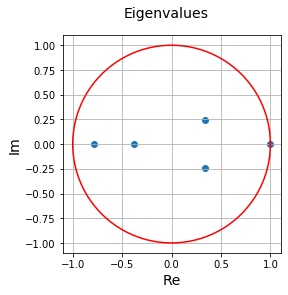

In [9]:
f_Plot_Eigenvals(w)

### • What is its invariant probability π?

In [10]:
Kn = np.real(np.multiply.outer(v1, u1))
pi = Kn[0,:]
print("π = ",pi)

π =  [0.14473383 0.13883436 0.25635194 0.2288997  0.2041219 ]


In [11]:
# As a check, we verify that π K = K.
n = np.shape(K)[0]
Kn = np.linalg.matrix_power(K,n)
np.matmul(pi,Kn) - pi

array([ 0.00095288,  0.09874479, -0.01184022, -0.0155046 , -0.07235286])

In [12]:
# Instead, approximate the stationary distribution
# with the distribution after 1000 steps:
nu = np.array([1,0,0,0,0])
# nu2 = np.array([1,1,1,1,1])/5
n = 10000
Kn2 = np.linalg.matrix_power(K,n)
pi2 = np.matmul(nu,Kn2)
diff = pi-pi2
print(np.matmul(pi2,Kn2) - pi2)
print("pi=",pi)
print("pi2=",pi2)
print("diff =",diff)
print("There's a difference. Floating point precision?")

[-7.46624984e-15 -1.17961196e-14 -1.32671651e-14 -1.05193632e-14
 -7.18869408e-15]
pi= [0.14473383 0.13883436 0.25635194 0.2288997  0.2041219 ]
pi2= [0.14875899 0.23526558 0.26348128 0.20979869 0.14269545]
diff = [-0.00402516 -0.09643123 -0.00712935  0.01910101  0.06142645]
There's a difference. Floating point precision?


### • What is the value of λ_slem = ||λ_2|| ?

In [13]:
lambda_slem = np.sqrt(np.real(w[1])**2 + np.imag(w[1])**2)

# 'abs' does the same thing:
lambda_slem = np.abs(w[1])
print("λ_slem = ", lambda_slem)

λ_slem =  0.7833305170331075


### 2. Suppose we start with an initial probabilities ν = (1, 0, 0, 0, 0) i.e. we know for sure that the initial state is at x0 = 1. So, at step n, the Markov chain state follows a n distribution μ_n = ν · K . We compute the distance between μ_n and π by TV-norm, dTV(n) = ||π − μ_n||_TV or KL-divergence. Plot dTV(n) and dKL(n) for the first 1000 steps.

In [14]:
# This function computes the TV norm and KL divergence:
def f_Norms(K,nu,num):
    # Inputs: Stochastic matrix K, initial condition nu,
    # and number of iterations num
    mu = np.zeros((np.size(nu),num+1))
    mu[:,0] = nu
    d_TV = np.zeros(num)
    d_KL = np.zeros(num)
    for n in np.arange(num):
        mu[:,n+1] = np.matmul(mu[:,n],K) # Update state
        d_TV[n] = scipy.linalg.norm(pi2 - mu[:,n+1], 1)/2 # TV Norm
        if (np.min(mu[:,n+1]) > 0):
            d_KL[n] = np.sum(pi2*np.log(pi2/mu[:,n+1])) # KL Norm
    return d_TV, d_KL

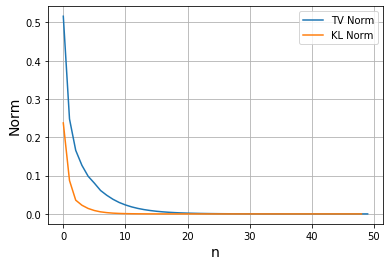

In [15]:
# Compute and plot:

nu = np.array([1,0,0,0,0])
num = 50
d_TV, d_KL = f_Norms(K,nu,num)

fig,ax = plt.subplots()
plt.plot(d_TV,label="TV Norm")
plt.plot(d_KL[1:np.size(d_KL)],label="KL Norm")
plt.xlabel('n', fontsize=14)
plt.ylabel('Norm', fontsize=14)
plt.legend()
plt.grid()
plt.show()

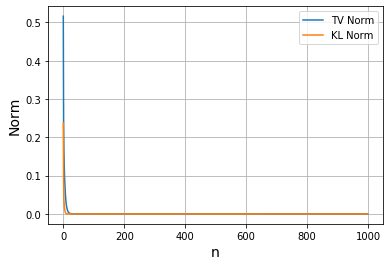

In [16]:
# Compute and plot:

nu = np.array([1,0,0,0,0])
num = 1000
d_TV, d_KL = f_Norms(K,nu,num)

fig,ax = plt.subplots()
plt.plot(d_TV,label="TV Norm")
plt.plot(d_KL[1:np.size(d_KL)],label="KL Norm")
plt.xlabel('n', fontsize=14)
plt.ylabel('Norm', fontsize=14)
plt.legend()
plt.grid()
plt.show()

### 3. Calculate the contraction coefficient for K. Note that contraction coefficient is the maximum TV-norm between any two rows in the transition kernel,
### C(K) = max_{x,y} ||K(x, ·) − K(y, ·)||_TV.
### One can prove that
### ||ν1 · K − ν2 · K||_TV ≤ C(K)||ν1 − ν2||_TV.
### As ||ν1 − ν2||_TV ≤ 1, if C(K) < 1 then the convergence rate could be upper bounded by
### A(n) = ||ν1 · K^n − ν2 · K^n||_TV ≤ C^n(K)||ν1 − ν2||_TV ≤ C^n(K), ∀ ν1, ν2.
### Plot the bound C^n(K) over n = 1,...,1000.

In [2]:
def f_Contract_Coeff(K):
    n = np.shape(K)[0] # Dim of K
    D = np.zeros(int(n*(n-1)/2))
    k = 0
    for i in np.arange(n-1):
        for j in (np.arange(n-(i+1))+(i+1)):
            D[k] = scipy.linalg.norm(K[i,:] - K[j,:],1)/2
            k += 1
    con_coeff = np.max(D)
#     print(D)
    return con_coeff

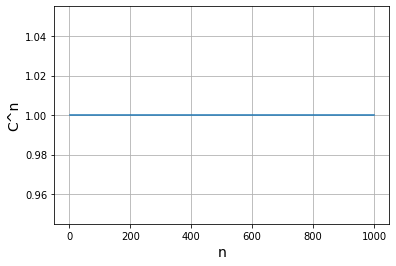

In [8]:
C = f_Contract_Coeff(K)

num = 1000
A = C*np.ones(num)
for n in np.arange(num):
    A[n] = C**(n+1)

fig,ax = plt.subplots()
plt.plot(np.arange(num)+1,A)
plt.xlabel('n', fontsize=14)
plt.ylabel('C^n', fontsize=14)
plt.grid()
plt.show()

### 4. There is another bound – the Diaconis-Hanlon bound below,
### B(n) = ||π − νKn||_TV ≤ sqrt(1 − π(x_0)/4π(x0)) λ_{slem}^{n}
### where x0 = 1 is the initial state and π(x0) is a target probability at x = 1. Plot the real convergence rate d_TV(n) in comparison with A(n) and B(n).
### [Draw the three curves in the same figure to compare, then draw a 2nd figure to compare their log-plots as they are exponential rates.]

In [19]:
num = 1000
B = np.zeros(num)
c = np.sqrt((1-pi[0])/(4*pi[0]))
for n in np.arange(num):
    B[n] = c*(lambda_slem**(n+1))

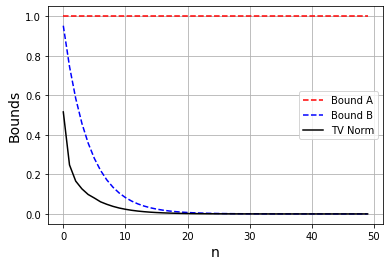

In [20]:
lim = 50
fig,ax = plt.subplots()
plt.plot(np.arange(lim),A[0:lim],'--',color='red',label="Bound A")
plt.plot(np.arange(lim),B[0:lim],'--',color='blue',label="Bound B")
plt.plot(np.arange(lim),d_TV[0:lim],'black',label="TV Norm")
plt.xlabel('n', fontsize=14)
plt.ylabel('Bounds', fontsize=14)
plt.legend()
plt.grid()
plt.show()

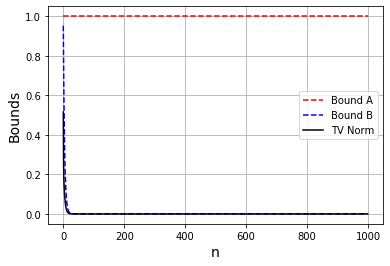

In [21]:
lim = 1000
fig,ax = plt.subplots()
plt.plot(np.arange(lim),A[0:lim],'--',color='red',label="Bound A")
plt.plot(np.arange(lim),B[0:lim],'--',color='blue',label="Bound B")
plt.plot(np.arange(lim),d_TV[0:lim],'black',label="TV Norm")
plt.xlabel('n', fontsize=14)
plt.ylabel('Bounds', fontsize=14)
plt.legend()
plt.grid()
plt.show()

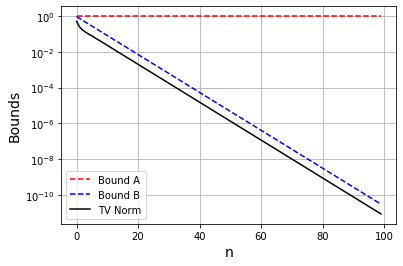

In [22]:
lim = 100
fig,ax = plt.subplots()
plt.plot(np.arange(lim),A[0:lim],'--',color='red',label="Bound A")
plt.plot(np.arange(lim),B[0:lim],'--',color='blue',label="Bound B")
plt.plot(np.arange(lim),d_TV[0:lim],'black',label="TV Norm")
plt.xlabel('n', fontsize=14)
plt.ylabel('Bounds', fontsize=14)
ax.set_yscale('log')
plt.legend()
plt.grid()
plt.show()

### 5. We define a new Markov chain with transition kernel P = K^n. Then draw the 5 eigenvalues of P on a 2D complex plane as you did in (1). Show how these eigenvalues move on the plane at three stages: n = 10, 100, 1000. You’d better draw the traces of the 5 dots (link the movements of the 5 dots to show their trajectories).
### Printout the matrix P for n = 1000 and see whether it becomes the “ideal” transition kernel.

In [23]:
# Plot eigenvalues in the complex plane,
# in the same figure.
def f_Eigenval_Trajectories(K,n_max):
    fig,ax = plt.subplots()
    for n in np.arange(n_max):
        P = np.linalg.matrix_power(K,n)
        w = eig(P)[0]
        if n == 10:
            marker = 'x'
        elif n == 100:
            marker = 'o'
        elif n == 1000:
            marker = 's'
        else:
            marker = '.'
        ax.scatter(w[0].real,w[0].imag,c='black',marker=marker)
        ax.scatter(w[1].real,w[1].imag,color='blue',marker=marker)
        ax.scatter(w[2].real,w[2].imag,color='red',marker=marker)
        ax.scatter(w[3].real,w[3].imag,color='green',marker=marker)
        ax.scatter(w[4].real,w[4].imag,color='orange',marker=marker)
    theta = np.linspace(0, 2*np.pi, 100)
    r = np.sqrt(1.0)
    x1 = r*np.cos(theta)
    x2 = r*np.sin(theta)
    ax.plot(x1, x2, 'red')
    ax.set_aspect(1)
    plt.suptitle('Eigenvalues', fontsize=14)
    plt.xlabel('Re', fontsize=14)
    plt.ylabel('Im', fontsize=14)
    plt.grid()
    plt.show()

In [24]:
# Plot the eigenvalues in the complex plane,
# for a given n.
def f_Eigenval_Trajectories2(K,n):
    P = np.linalg.matrix_power(K,n)
    w = eig(P)[0]
    f_Plot_Eigenvals(w)

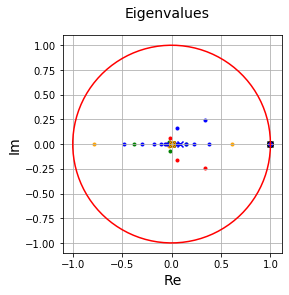

In [25]:
f_Eigenval_Trajectories(K,1000)

### All eigenvalues, except the eigenvalue equal to one, converge to zero. There is some oscillatory behavior. For instance, the blue eigenvalue quickly reaches the real axis, but then oscillates before settling to zero.

### Plotting separately for different n shows the convergence more clearly:

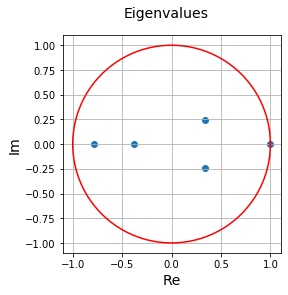

In [26]:
f_Eigenval_Trajectories2(K,1)

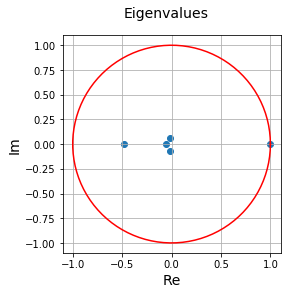

In [27]:
f_Eigenval_Trajectories2(K,3)

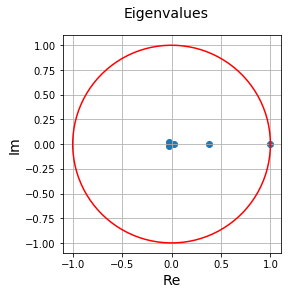

In [28]:
f_Eigenval_Trajectories2(K,4)

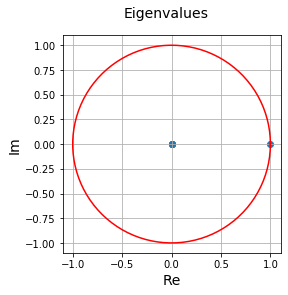

In [29]:
f_Eigenval_Trajectories2(K,20)

### 2) BZ, Chapter 3, Problem 2, page 48

### Now we consider two more transition matrices, K1 and K2.

In [30]:
K1 = np.array([[0.1, 0.4, 0.3, 0.0, 0.2],
               [0.5, 0.3, 0.2, 0.0, 0.0],
               [0.0, 0.4, 0.5, 0.1, 0.0],
               [0.0, 0.0, 0.0, 0.5, 0.5],
               [0.0, 0.0, 0.0, 0.7, 0.3]])

K2 = np.array([[0.0, 0.0, 0.0, 0.4, 0.6],
               [0.0, 0.0, 0.0, 0.5, 0.5],
               [0.0, 0.0, 0.0, 0.9, 0.1],
               [0.0, 0.2, 0.8, 0.0, 0.0],
               [0.3, 0.0, 0.7, 0.0, 0.0]])

In [95]:
# This function computes the stationary
# distribution of a matrix K.
def f_Stationary(K):
    # Get eigenvals and left and right eigenvecs:
    w, vl, vr = eig(K, left=True)
    # Get indices of eigenvals by largest modulus:
    idx = np.abs(w).argsort()[::-1]
    # Sort eigenvals/vecs by largest modulus:
    w = w[idx]
    vl = vl[:,idx]
    vr = vr[:,idx]
    u1 = vl[:,0] # First left eigenvec
    v1 = vr[:,0] # First right eigenvec
    Kn = np.real(np.multiply.outer(v1, u1)) # K^n
    pi = Kn[0,:] # Stationary distribution
    
    nu = np.ones(np.shape(K)[0])/np.shape(K)[0]
    Kn2 = np.linalg.matrix_power(K,1000)
    pi2 = np.matmul(nu,Kn)
    diff1 = np.sum(np.abs(np.matmul(pi,K) - pi))
    diff2 = np.sum(np.abs(np.matmul(pi2,K) - pi2))
    if diff2 < diff1:
        pi = pi2
    
    return pi

In [71]:
# This function computes the number
# of communication classes of a Markov
# chain, with stochastic matrix K.
def f_Comm_Classes(K):
    n = np.shape(K)[0] # Dim of K
    I = np.eye(n) # Identity matrix
    # Change nonzero entries in K to 1:
    Z = np.double(K>0)
    # Compute (I+Z)^(n-1):
    b = np.linalg.matrix_power((I+Z), n-1)
    R = np.double(b>0) # Reachability matrix
    Rt = R.T # Can-be-reached matrix
    C = np.minimum(R,Rt) # Can reach & be reached matrix
    # Number of communication classes:
    CC = np.linalg.matrix_rank(C)
    return CC

In [72]:
# Find the GCD of a list:
from functools import reduce
def f_gcd(list):
    x = reduce(np.gcd, list)
    return x

In [88]:
# Computes the periodicity of an
# irreducible Markov chain.
def f_Periodicity(K):
    # To check the periodicity of the ith
    # state, we need to check at which values
    # of n K^n[i][i] is nonzero. The GCD of
    # these values is the period of this state.
    
    # By assumption, K is irreducible. All states
    # in the same communicating class have the
    # same period, so it suffices to compute the
    # period of the first state.
    
    n = np.shape(K)[0] # Dim of K
    Kn11 = np.zeros(n) # Array to hold periods
    
    # We only need to loop through n+1 states,
    # since any more than this would require
    # us to visit the same state twice.
    for i in np.arange(n)+1:
        # The (1,1)th entry of K^n:
        Kn11[i-1] = np.linalg.matrix_power(K,i)[0][0]
    # The indices where Kn11 is nonzero:
    d = np.where(Kn11>0)[0]+1
    # Return the GCD of the periods:
    return(f_gcd(d))

### 1. Are K1 and K2 irreducibly, aperiodic?

In [89]:
pi_1 = f_Stationary(K1)
CC_1 = f_Comm_Classes(K1)
P_1 = f_Periodicity(K1)

pi_2 = f_Stationary(K2)
CC_2 = f_Comm_Classes(K2)
P_2 = f_Periodicity(K2)

print("The stationary distibution of K1 is", pi_1)
print("Some entries of the stationary distribution are zero, so K1 has at least two communication classes.")
print("K1 has",CC_1, "communication classes.")
print("Thus, K1 is reducible.")
print("The period of K1 is ", P_1)
print(" ")

print("The stationary distibution of K2 is", pi_2)
print("K2 has",CC_2, "communication class.")
print("Thus, K2 is irreducible.")
print("The period of K2 is ", P_2)

The stationary distibution of K1 is [0.         0.         0.         0.36391267 0.25993762]
Some entries of the stationary distribution are zero, so K1 has at least two communication classes.
K1 has 2 communication classes.
Thus, K1 is reducible.
The period of K1 is  1
 
The stationary distibution of K2 is [0.02254514 0.06262538 0.30310682 0.31312688 0.07515045]
K2 has 1 communication class.
Thus, K2 is irreducible.
The period of K2 is  2


### 2. Printout the 5 eigenvalues and 5 eigenvectors of the two matrices.

In [278]:
# Returns the eigenvals/vecs in descending order:
def f_eigs(K):
    # Get eigenvals and left and right eigenvecs:
    w, vl, vr = eig(K, left=True)
    # Get indices of eigenvals by largest modulus:
    idx = np.abs(w).argsort()[::-1]
    # Sort eigenvals/vecs by largest modulus:
    w = w[idx]
    vl = vl[:,idx]
    vr = vr[:,idx]
    return w, vl, vr

In [285]:
w1, vl_1, vr_1 = f_eigs(K1)

print("The eigenvalues of K1 are:")
print(w1)
print("The eigenvectors of K1 are:")
print(vr_1)

The eigenvalues of K1 are:
[ 1.        +0.j  0.91523509+0.j -0.2       +0.j -0.19765527+0.j
  0.18242018+0.j]
The eigenvectors of K1 are:
[[ 0.4472136   0.51993127 -0.55694326  0.55344942  0.16476434]
 [ 0.4472136   0.61519676  0.72146404 -0.72254626  0.61330322]
 [ 0.4472136   0.59262502 -0.41130193  0.41427122 -0.77247127]
 [ 0.4472136   0.         -0.00674265  0.          0.        ]
 [ 0.4472136   0.          0.00943972  0.          0.        ]]


In [286]:
w2, vl_2, vr_2 = f_eigs(K2)

print("The eigenvalues of K2 are:")
print(w2)
print("The eigenvectors of K2 are:")
print(vr_2)

The eigenvalues of K2 are:
[ 1.00000000e+00+0.j -1.00000000e+00+0.j  2.64575131e-01+0.j
 -2.64575131e-01+0.j -4.92450772e-17+0.j]
The eigenvectors of K2 are:
[[ 4.47213595e-01  4.47213595e-01  7.23028305e-01 -7.23028305e-01
   4.92518281e-01]
 [ 4.47213595e-01  4.47213595e-01  5.45140389e-01 -5.45140389e-01
   8.44317054e-01]
 [ 4.47213595e-01  4.47213595e-01 -1.66411277e-01  1.66411277e-01
  -2.11079263e-01]
 [ 4.47213595e-01 -4.47213595e-01 -9.10930041e-02 -9.10930041e-02
   7.92305104e-17]
 [ 4.47213595e-01 -4.47213595e-01  3.79554184e-01  3.79554184e-01
   0.00000000e+00]]


### 3. How many and what are the invariant probabilities for each matrix?

In [289]:
# Every stationary distribution of a Markov chain is concentrated on the closed communicating classes.
# In the case of K1, there are two communicating classes, so one is closed.
# The closed communicating class is irreducible, and thus has a unique stationary distribution.
# It follows that K1 has a unique stationary distribution.
print("The stationary distibution of K1 is:", pi_1)

The stationary distibution of K1 is: [0.         0.         0.         0.36391267 0.25993762]


In [290]:
# Every irreducible, finite state space Markov chain has a unique stationary distribution.
# Thus, K2 has a unique stationary distribution.
print("The stationary distibution of K2 is:", pi_2)

The stationary distibution of K2 is: [0.02254514 0.06262538 0.30310682 0.31312688 0.07515045]
